In [1]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("british_airways.csv",parse_dates=True,index_col="Date")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2005-07-01 to 2016-03-01
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Adjusted Passenger Count  129 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB


In [39]:
df.reset_index(inplace=True)

In [44]:
df.rename({"Date":"ds","Adjusted Passenger Count":"y"},axis="columns",inplace=True)

In [46]:
df.head()

,ds,y
0,2005-07-01,21686
1,2005-08-01,20084
2,2005-09-01,20635
3,2005-10-01,18988
4,2005-11-01,15554


In [17]:
from prophet import Prophet

## Train/test split and 12 months prediction.

In [67]:
test = df[-12:]
train = df[:-12]

In [71]:
prophet_model = Prophet()
prophet_model.fit(train)
future_12 = prophet_model.make_future_dataframe(periods=12, freq="MS")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.42506


,ds
124,2015-11-01
125,2015-12-01
126,2016-01-01
127,2016-02-01
128,2016-03-01


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       301.005   0.000459512       86.1115           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       301.407   1.84795e-06         79.46           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       301.409    4.1773e-06       83.6744   4.733e-08       0.001      334  LS failed, Hessian reset 
     261        301.41   8.68894e-11        86.361   9.526e-06           1      388   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [84]:
forecast_12 = m.predict(future_12)

<AxesSubplot:>

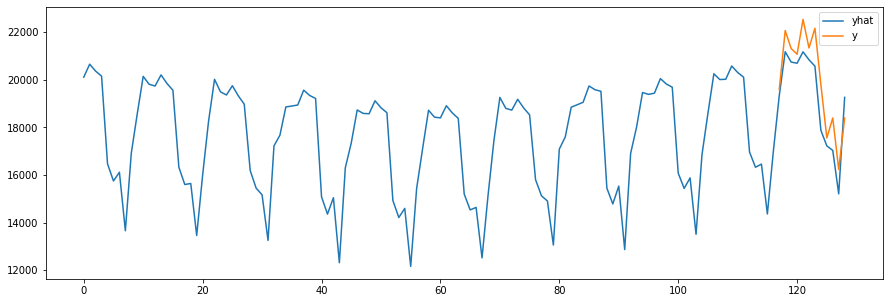

In [81]:
forecast_12["yhat"].plot(figsize=(15,5),legend=True)
test['y'].plot(legend=True)

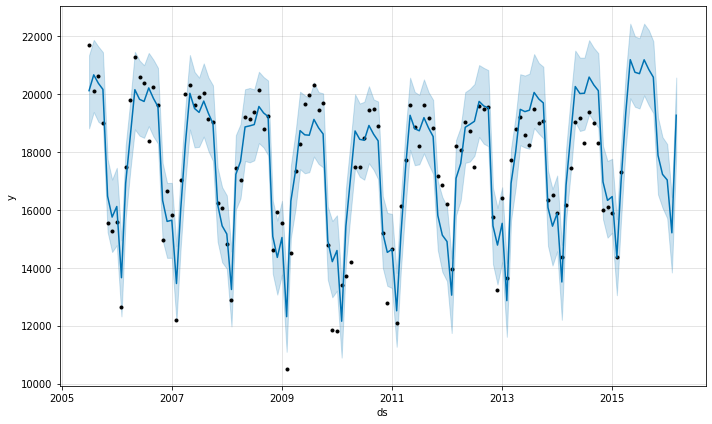

In [86]:
fig1 = prophet_model.plot(forecast_12)

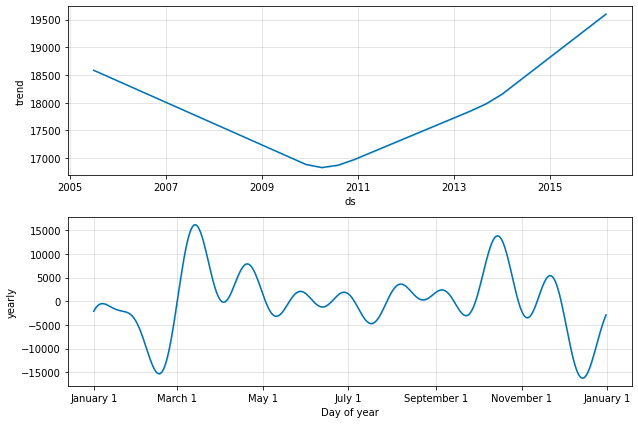

In [87]:
fig2 = prophet_model.plot_components(forecast_12)

In [83]:
from sklearn.metrics import mean_squared_error

error= mean_squared_error(forecast_12["yhat"][-12:],test['y'])
np.sqrt(error)

1058.6347087439726